# Segmenting and Clustering Neighborhoods in Toronto
###  Naveen Ram

## Q2)

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

#request to the list of postal codes

link = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
response = requests.get(link)
response

<Response [200]>

In [2]:
soup = BeautifulSoup(response.text, "html.parser")
#soup

In [3]:
#We want to display the table to make sure it looks right for the pandas read_html call

from IPython.display import display_html
table = str(soup.findAll('table')[0])
display_html(table, raw=True)

Postcode,Borough,Neighbourhood
M1A,Not assigned,Not assigned
M2A,Not assigned,Not assigned
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,Harbourfront
M6A,North York,Lawrence Heights
M6A,North York,Lawrence Manor
M7A,Queen's Park,Not assigned
M8A,Not assigned,Not assigned
M9A,Downtown Toronto,Queen's Park


In [4]:
#Getting the data frame from the html data

dfs = pd.read_html(table, header=0)
df = dfs[0]
df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


## Q3)

In [5]:
#Get rid of useless data
df = df[df.Borough != 'Not assigned']
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [7]:
#replace the Not assigned neighbourhoods with it's Borough name
df.loc[df['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = df.loc[df['Neighbourhood'] == 'Not assigned', 'Borough']

C:\Users\NaveenRam\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\NaveenRam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor


In [9]:
#group the dataframe by the postcode and borough and aggregate the neighbourhoods into a comma separated list
df = df.groupby(['Postcode', 'Borough'], as_index=False).agg(lambda x: ', '.join(set(x.dropna())))

In [10]:
df.head()

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Morningside, Guildwood, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae


In [11]:
df.shape

(103, 3)

## Q4)

In [13]:
!pip install wget
import wget
file = wget.download("https://cocl.us/Geospatial_data")

  Stored in directory: C:\Users\NaveenRam\AppData\Local\pip\Cache\wheels\40\15\30\7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
100% [................................................................................] 2891 / 2891

In [14]:
df2 = pd.read_csv(file)
df2.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [17]:
#combine data from original and new data
data = df.merge(df2, left_on='Postcode', right_on='Postal Code').drop(['Postal Code'], axis=1)

In [18]:
data.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Morningside, Guildwood, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


In [19]:
# Only keep the data that relates to Toronto
toronto_data = data[data['Borough'].str.contains('Toronto')].reset_index(drop=True)

In [20]:
toronto_data

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Rathnelly, Forest Hill SE, Deer Park, South Hi...",43.686412,-79.400049


In [23]:
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
address = 'Toronto, ON'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

C:\Users\NaveenRam\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [25]:
!pip install folium
import folium
# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

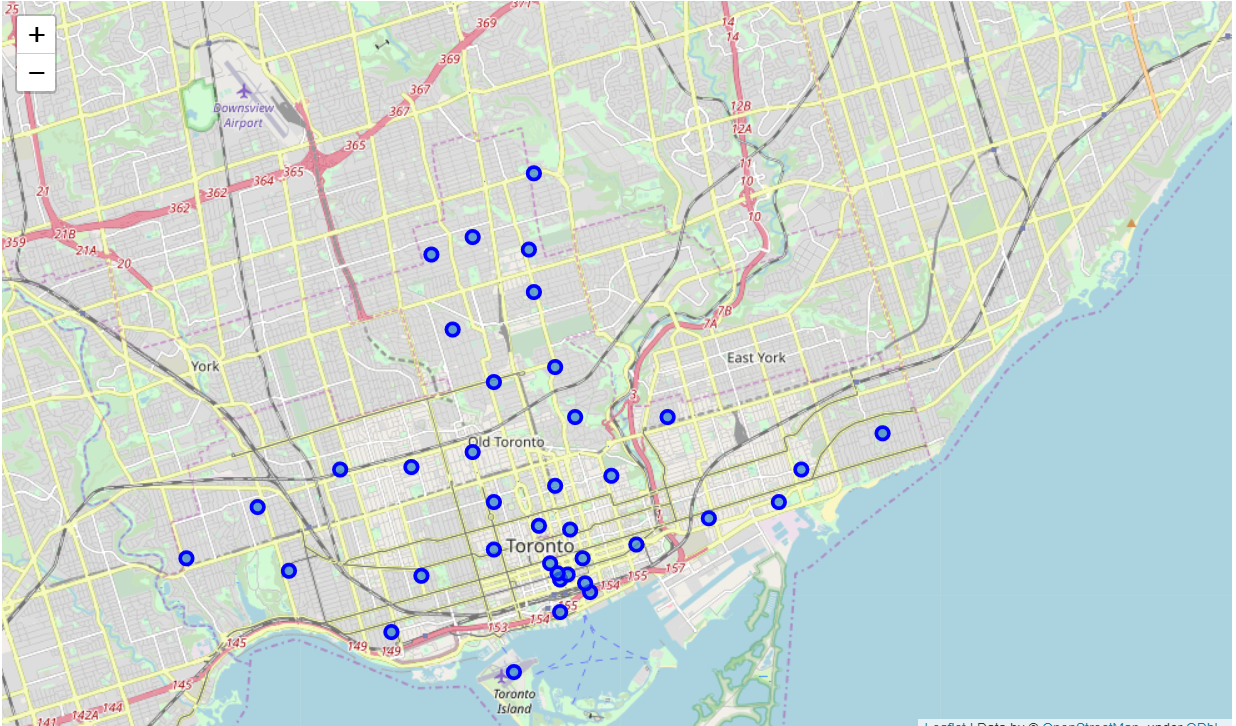

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [31]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore'

        params = dict(
          client_id='',
          client_secret='',
          v='20180323',
          ll=str(lat)+','+str(lng),
          limit=100,
          radius=500

        )
        resp = requests.get(url=url, params=params)
        results = json.loads(resp.text)["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
import json
toronto_venues = getNearbyVenues(names=toronto_data['Neighbourhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

The Beaches
Riverdale, The Danforth West
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Rathnelly, Forest Hill SE, Deer Park, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
King, Adelaide, Richmond
Toronto Islands, Harbourfront East, Union Station
Toronto Dominion Centre, Design Exchange
Victoria Hotel, Commerce Court
Roselawn
Forest Hill North, Forest Hill West
North Midtown, The Annex, Yorkville
University of Toronto, Harbord
Grange Park, Chinatown, Kensington Market
King and Spadina, Harbourfront West, Bathurst Quay, South Niagara, CN Tower, Railway Lands, Island airport
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dufferin, Dovercourt Village
Little Portugal, Trinity
Brockton, Parkdale Village, Exhibition Place
High Park, The Junction Sout

In [33]:
toronto_venues.shape

(1685, 7)

In [34]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"Riverdale, The Danforth West",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [35]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,57,57,57,57,57,57
"Brockton, Parkdale Village, Exhibition Place",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,17,17,17,17,17,17
"Cabbagetown, St. James Town",46,46,46,46,46,46
Central Bay Street,80,80,80,80,80,80
Christie,17,17,17,17,17,17
Church and Wellesley,84,84,84,84,84,84
Davisville,36,36,36,36,36,36
Davisville North,8,8,8,8,8,8


In [36]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 235 uniques categories.


In [37]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")
toronto_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# add neighborhood column back to dataframe
mid = toronto_onehot['Neighborhood']
toronto_onehot.drop(labels=['Neighborhood'], axis=1,inplace = True)
toronto_onehot.insert(0, 'Neighborhood', mid)

toronto_onehot.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Riverdale, The Danforth West",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
toronto_onehot.shape

(1685, 235)

In [39]:
#average by category

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Berczy Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.017544,0.0,0.0,0.0000,0.0,0.0,0.000000
1,"Brockton, Parkdale Village, Exhibition Place",0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.000000
2,Business Reply Mail Processing Centre 969 Eastern,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.058824
3,"Cabbagetown, St. James Town",0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0,0.0,0.021739
4,Central Bay Street,0.0,0.0,0.0,0.0,0.0,0.0,0.0125,0.0,0.0,...,0.0,0.0,0.0,0.012500,0.0,0.0,0.0125,0.0,0.0,0.012500


In [40]:
#grab the top 5 frequencies in each neighborhood
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Berczy Park----
                venue  freq
0         Coffee Shop  0.07
1              Bakery  0.05
2                Café  0.04
3        Cocktail Bar  0.04
4  Seafood Restaurant  0.04


----Brockton, Parkdale Village, Exhibition Place----
            venue  freq
0  Breakfast Spot  0.10
1            Café  0.10
2     Coffee Shop  0.10
3          Bakery  0.05
4   Grocery Store  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.12
1         Yoga Studio  0.06
2                 Spa  0.06
3       Garden Center  0.06
4              Garden  0.06


----Cabbagetown, St. James Town----
                venue  freq
0         Coffee Shop  0.07
1                Park  0.07
2         Pizza Place  0.04
3  Italian Restaurant  0.04
4                Café  0.04


----Central Bay Street----
                venue  freq
0         Coffee Shop  0.15
1  Italian Restaurant  0.05
2      Sandwich Place  0.04
3        Burger Joint  0.04
4         

In [41]:
#cluster toronto data
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

In [42]:
toronto_data.insert(0,'Cluster Labels',kmeans.labels_)
toronto_data.head()

,Cluster Labels,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,0,M4K,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,0,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,0,M4M,East Toronto,Studio District,43.659526,-79.340923
4,0,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790


In [43]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood'], toronto_data['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

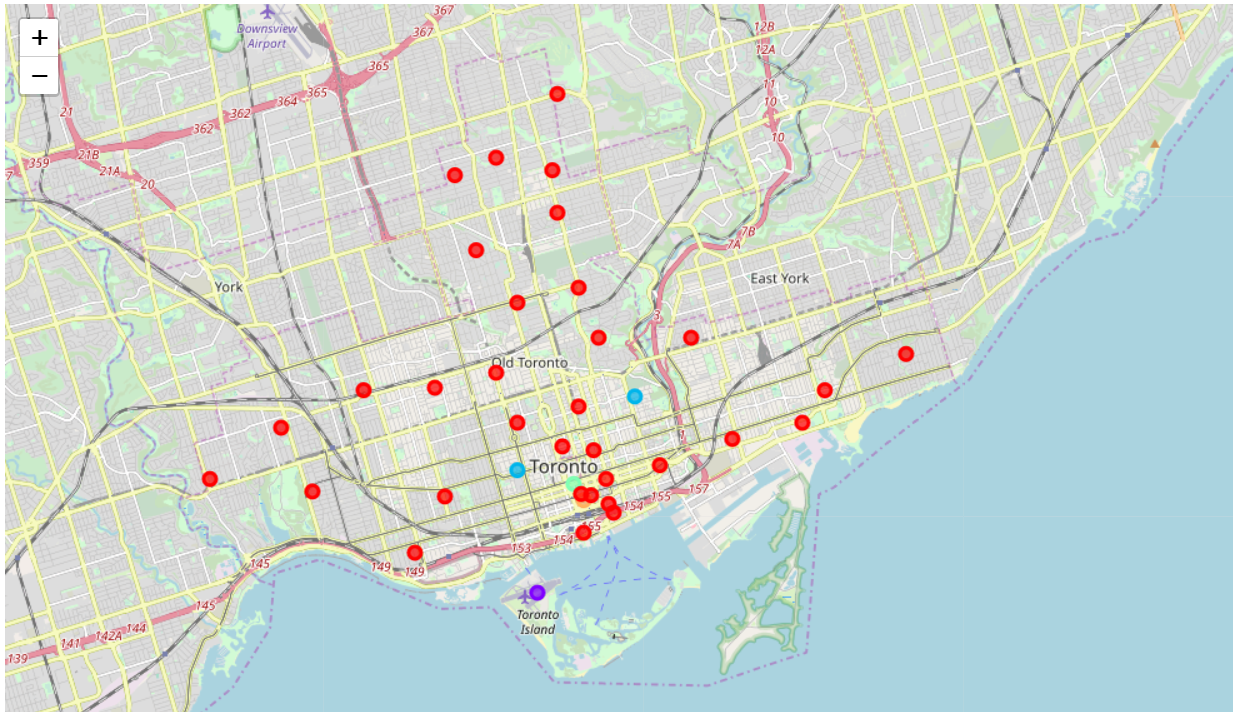

According to this clustering it seems that there are many neighborhoods that fit one cluster and few in the other four clusters. This shows that the K means model could be trained with better features to differentiate the clusters a little more. In order to get more detail, you can look at the neighborhoods in each cluster. 